# Importing necessary libraries

In [2]:
#For analysis and manipulation
import pandas as pd
import numpy as np

#For visualization
import seaborn as sns
import matplotlib.pyplot as plt

#To stop errors from cropping up
import warnings
warnings.filterwarnings("ignore")

#To create and evaluate the model
import statsmodels.formula.api as sm

## Loading Data

In [3]:
bill_registry=pd.read_csv("tips.csv")
bill_registry2=bill_registry

#  Data Analysis

### Initial investigation

In [4]:
bill_registry

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<b>Observations:<b>
  - Dataset has 244 rows and 7 columns
  - 'tip' is dependent/target variable and is continous in nature.
  -  Rest are independent variables.


---

In [5]:
#Checking for null values and datatypes
bill_registry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


 <b>Observations:</b> <br>
- Dataset contains 2 continous independent variables, 5 categorical independent variables. <br>
- Out of 5 categorical variables, 4 are string/object type and 1 is numeric.

---

In [6]:
#Converting numeric categorical variable 'size' to object type for the analysis
bill_registry['size']=bill_registry['size'].astype('category')

In [7]:
#Investigating standard deviation, unique values, mean, etc
bill_registry.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.0
unique,NaN,NaN,2,2,4,2,6.0
top,NaN,NaN,Male,No,Sat,Dinner,2.0
freq,NaN,NaN,157,151,87,176,156.0
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,NaN
std,8.902412,1.383638,NaN,NaN,NaN,NaN,NaN
min,3.070000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,NaN
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,NaN
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,NaN


 <b>Observations:</b> <br>
- More non smoker visit the place <br>
- Saturday is the busiest day <br>
- Males visit the place more <br>
- More people come to eat at dinner <br>
- Usually customers visit in groups of 2 <br> 

- 75% of observations in 'tip' column lie under 3.5 but maximum is 10, there can outliers in this column <br>

---

In [8]:
#Finding unique values for categorical variables
#First for 'size' (numeric type categorical variable)
bill_registry['size'].unique()

[2, 3, 4, 1, 6, 5]
Categories (6, int64): [1, 2, 3, 4, 5, 6]

In [9]:
#For 'time'
bill_registry['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [10]:
#For 'sex'
bill_registry['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [11]:
#For 'day'
bill_registry['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [12]:
#For 'smoker'
bill_registry['smoker'].unique()

array(['No', 'Yes'], dtype=object)

---

In [13]:
#Checking 'total_bill' and 'tip' for skewness
bill_registry.skew()

total_bill    1.133213
tip           1.465451
dtype: float64

In [14]:
#'total_bill' and 'tip' both are positively skewed

---

## Data Visualization

### 1. Univariate Analysis

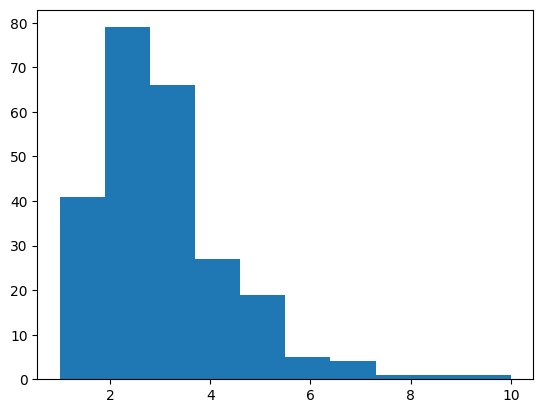

In [15]:
#Plotting histogram of 'tip' to show skewness
plt.hist(bill_registry['tip'])
plt.show()

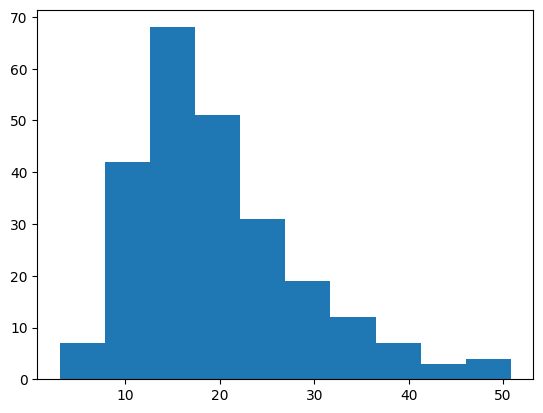

In [16]:
#Plotting histogram of 'total_bill' to show skewness
plt.hist(bill_registry['total_bill'])
plt.show()

---

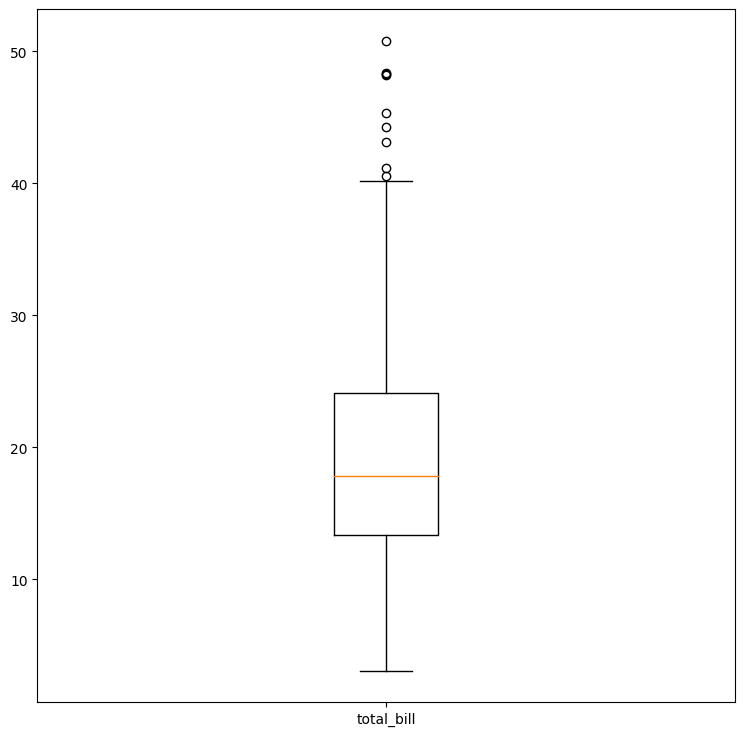

In [17]:
#Drawing box and whisker plot for 'total_bill' using plt 
plt.figure(figsize=(9,9))
plt.boxplot(bill_registry['total_bill'],labels=['total_bill'])
plt.show()

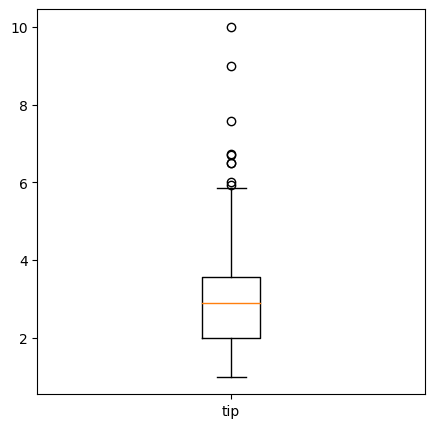

In [18]:
plt.figure(figsize=(5,5))
plt.boxplot(bill_registry['tip'],labels=['tip'])
plt.show()

 <b>Observations:</b> <br>
- Both 'totat_bill' and 'tip' have outliers <br>
- Outlier removal treatment required

---

### 2. Bivariate Analysis

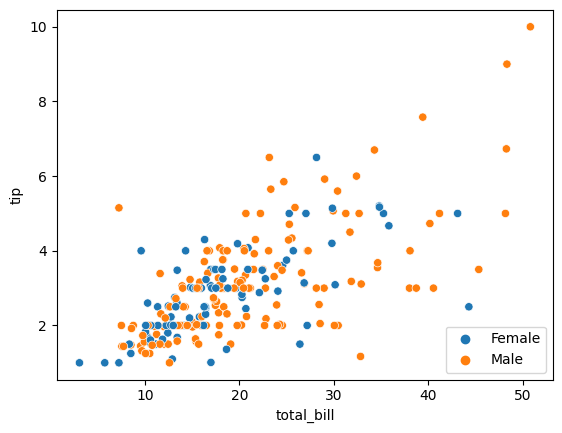

In [19]:
#Showing the relationship between 'total_bill' and 'tip'
sns.scatterplot(x=bill_registry['total_bill'],y=bill_registry['tip'],hue=bill_registry['sex'])
plt.legend(loc="lower right")
plt.show()
#Males eat more and give more tip

In [20]:
bill_registry.corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


---

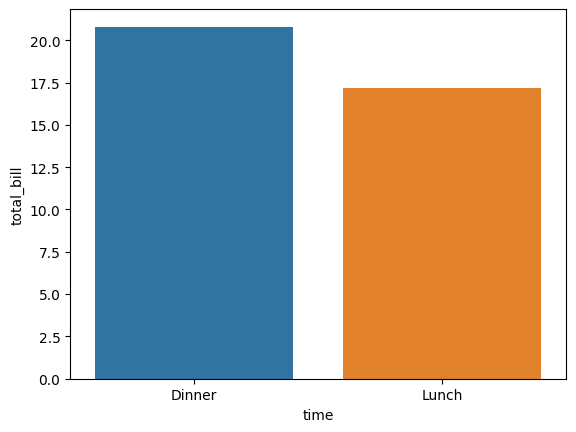

In [21]:
sns.barplot(y=bill_registry['total_bill'],x=bill_registry['time'],ci=None)
plt.show()

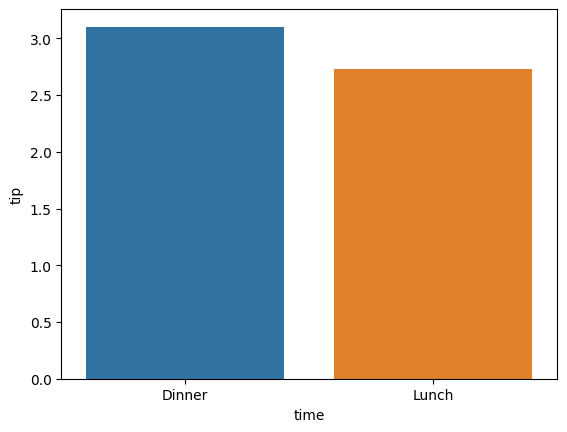

In [22]:
sns.barplot(y=bill_registry['tip'],x=bill_registry['time'],ci=None)
plt.show()

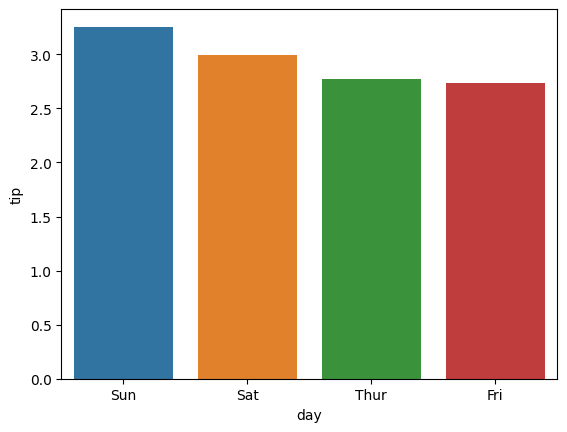

In [23]:
sns.barplot(y=bill_registry['tip'],x=bill_registry['day'],ci=None)
plt.show()

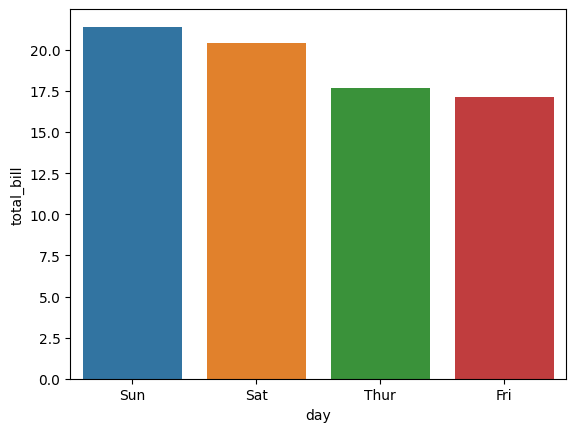

In [24]:
sns.barplot(y=bill_registry['total_bill'],x=bill_registry['day'],ci=None)
plt.show()

In [25]:
pd.crosstab(bill_registry['size'],bill_registry['day'])

day,Fri,Sat,Sun,Thur
size,,,,
1,1,2,0,1
2,16,53,39,48
3,1,18,15,4
4,1,13,18,5
5,0,1,3,1
6,0,0,1,3


In [26]:
pd.crosstab(bill_registry['time'],bill_registry['sex'])

sex,Female,Male
time,,
Dinner,52,124
Lunch,35,33


In [27]:
pd.crosstab(bill_registry['smoker'],bill_registry['sex'])

sex,Female,Male
smoker,,
No,54,97
Yes,33,60


---

# Data Preparation

## Outlier treatment

In [28]:
bill_registry['tip'].median(),bill_registry['tip'].mode()



(2.9,
 0    2.0
 Name: tip, dtype: float64)

In [29]:
#Storing dataset in a temporary variable
temp=bill_registry

In [30]:
#Function for removing outliers
def outlier_remover(value):
    
    
    
    #Since distribution of 'tip' and 'total_bill' are skewed, we will use IQR method for outlier removal
    percentile25 = temp[value].quantile(0.25)
    percentile75 = temp[value].quantile(0.75)

    #Calculating IQR
    iqr=percentile75-percentile25

    #Calculating fencing values
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr




    #Replacing ouliers with mode
    for i in range(0,len(temp.index)):
              if temp[value][i]<lower_limit or temp[value][i]>upper_limit:
                  temp[value][i]=temp[value].mode()
                


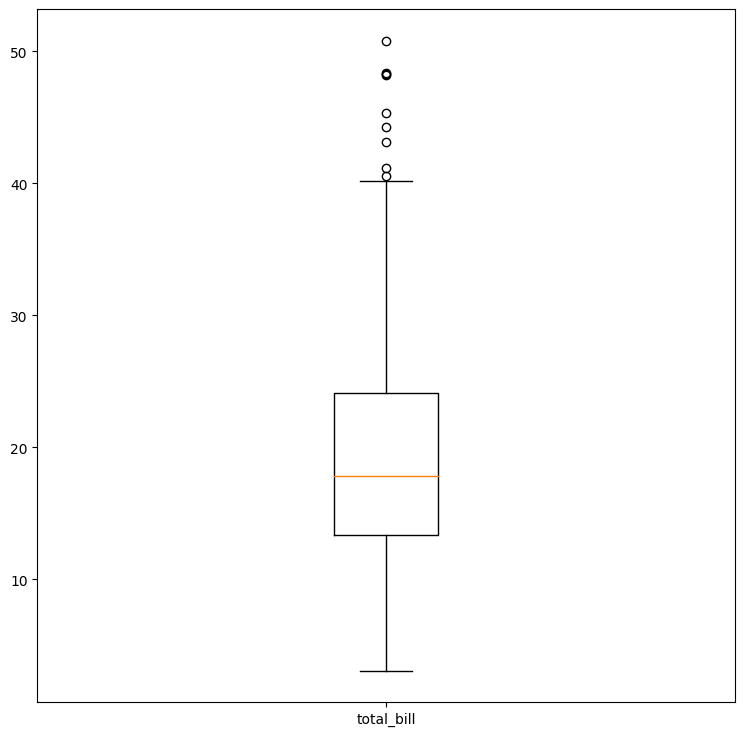

In [31]:
#Before removal

plt.figure(figsize=(9,9))
plt.boxplot(bill_registry['total_bill'],labels=['total_bill'])
plt.show()

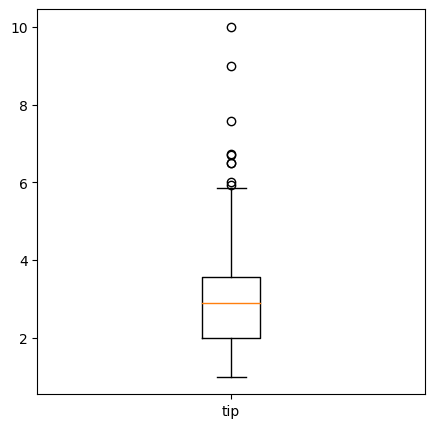

In [32]:
#Before removal

plt.figure(figsize=(5,5))
plt.boxplot(bill_registry['tip'],labels=['tip'])
plt.show()

In [33]:
#Removing outliers
outlier_remover('total_bill')
outlier_remover('tip')

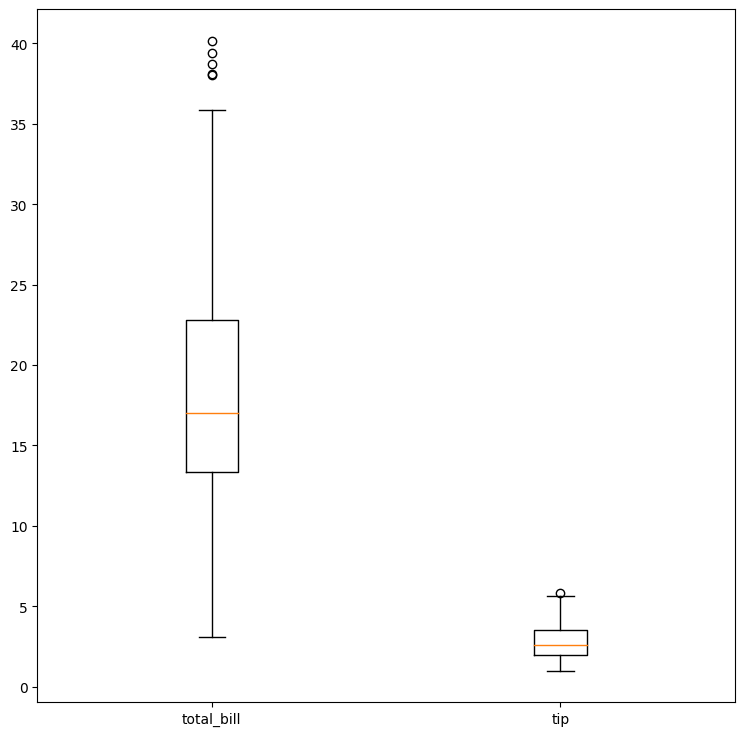

In [34]:
#After removal

#Drawing boxplot for tip and total_bill
numerical_value=bill_registry.drop(['smoker','sex','day','time','size'],axis=1)

#Drawing box and whisker plot for numerical_value using plt 
plt.figure(figsize=(9,9))
plt.boxplot(numerical_value.values,labels=['total_bill','tip'])
plt.show()

#Mode replacement did not work for total_bill

---

In [35]:
#Removing outliers in total_bill using median replacement method
#Since distribution of 'total_bill' are skewed, we will use IQR method for outlier removal
percentile25 = temp['total_bill'].quantile(0.25)
percentile75 = temp['total_bill'].quantile(0.75)

#Calculating IQR
iqr=percentile75-percentile25

#Calculating fencing 'total_bill's
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr




#Replacing ouliers with mode
for i in range(0,len(temp.index)):
              if temp['total_bill'][i]<lower_limit or temp['total_bill'][i]>upper_limit:
                  temp['total_bill'][i]=bill_registry['total_bill'].median()

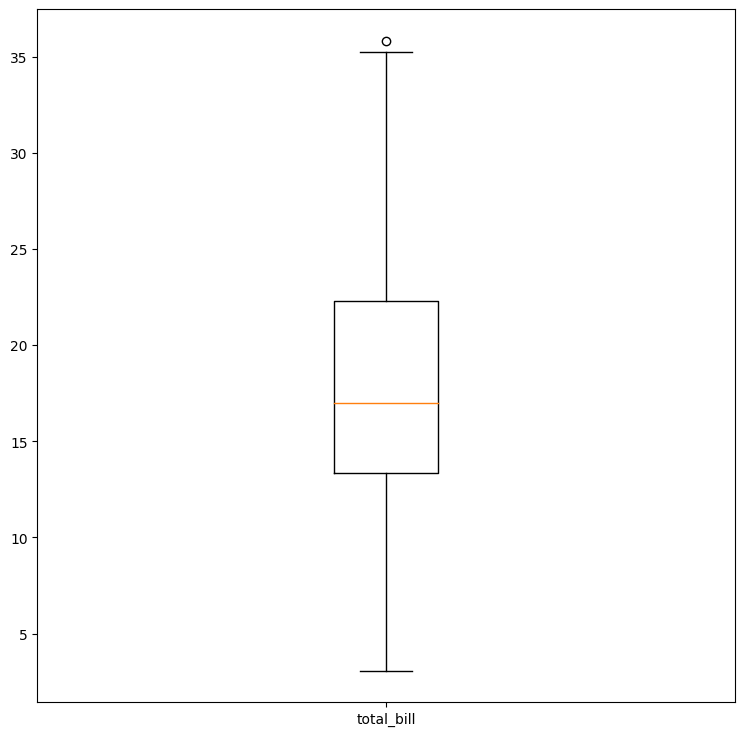

In [36]:
#Assigning new values
bill_registry=temp
#After removal

#Drawing box and whisker plot for 'total_bill' using plt 
plt.figure(figsize=(9,9))
plt.boxplot(bill_registry['total_bill'],labels=['total_bill'])
plt.show()

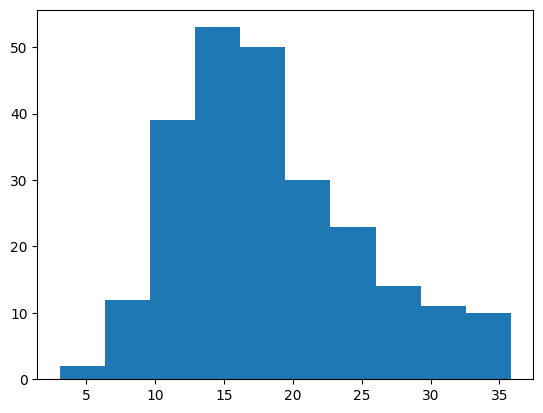

In [37]:
#After removal

plt.hist(bill_registry['total_bill'])
plt.show()

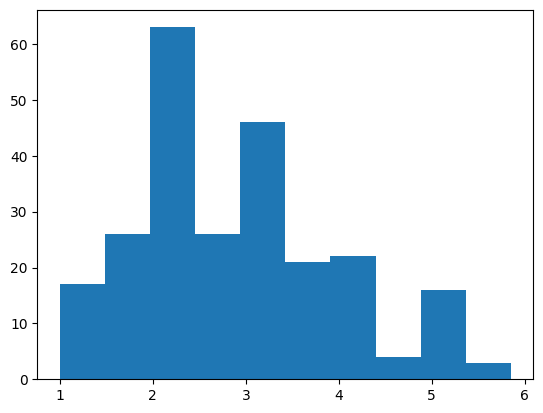

In [38]:
#After removal
plt.hist(bill_registry['tip'])
plt.show()

In [39]:
#After removal
bill_registry.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.0
unique,NaN,NaN,2,2,4,2,6.0
top,NaN,NaN,Male,No,Sat,Dinner,2.0
freq,NaN,NaN,157,151,87,176,156.0
mean,18.152039,2.805943,NaN,NaN,NaN,NaN,NaN
std,6.759278,1.091341,NaN,NaN,NaN,NaN,NaN
min,3.070000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,NaN
50%,16.991250,2.605000,NaN,NaN,NaN,NaN,NaN
75%,22.277500,3.500000,NaN,NaN,NaN,NaN,NaN


---

## Changing datatype of categorical values

### Creating a dataset with all the obversations in numerical form

In [40]:
#Joining all the relevant dataframes
experiment=pd.concat([bill_registry2,pd.get_dummies(temp['sex']),pd.get_dummies(temp['smoker']),pd.get_dummies(temp['day']),pd.get_dummies(temp['time'])],axis=1)

In [41]:
#Dropping object datatype columns  
#pd.set_option("display.max_rows", None, "display.max_columns", None)
bill_registry2=experiment.drop(['smoker','sex','day','time'],axis=1)
bill_registry2

,total_bill,tip,size,Female,Male,No,Yes,Fri,Sat,Sun,Thur,Dinner,Lunch
0,16.99,1.01,2,1,0,1,0,0,0,1,0,1,0
1,10.34,1.66,3,0,1,1,0,0,0,1,0,1,0
2,21.01,3.50,3,0,1,1,0,0,0,1,0,1,0
3,23.68,3.31,2,0,1,1,0,0,0,1,0,1,0
4,24.59,3.61,4,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,2.00,3,0,1,1,0,0,1,0,0,1,0
240,27.18,2.00,2,1,0,0,1,0,1,0,0,1,0
241,22.67,2.00,2,0,1,0,1,0,1,0,0,1,0
242,17.82,1.75,2,0,1,1,0,0,1,0,0,1,0


 <b>Observation:</b> <br>
- This dataset has collinearity <br>


---

### Trying to mitigate collinearity

In [42]:
#Collinarity can be mitigated by dropping 1 column each from categorical variables with 2 values. e.g:smoker,time,etc

#Droping columns
bill_registry2=bill_registry2.drop(['Female','No','Lunch'],axis=1)
bill_registry2

,total_bill,tip,size,Male,Yes,Fri,Sat,Sun,Thur,Dinner
0,16.99,1.01,2,0,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,0,1,0,1
4,24.59,3.61,4,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
239,29.03,2.00,3,1,0,0,1,0,0,1
240,27.18,2.00,2,0,1,0,1,0,0,1
241,22.67,2.00,2,1,1,0,1,0,0,1
242,17.82,1.75,2,1,0,0,1,0,0,1


---

### Preparing dataset 

In [43]:
#Adjusting tip column to the extreme rightside
temp=bill_registry2
bill_registry2=bill_registry2.drop(['tip'],axis=1)
bill_registry2=pd.concat([bill_registry2,temp['tip']],axis=1)

In [44]:
#Function for converting numerical datatype to categorical
def numbtcat(val):
    for i in val:
        bill_registry2[i]=bill_registry2[i].astype('category')

In [45]:
numbtcat(['Fri','Sat','Sun','Thur'])

In [46]:
bill_registry2.describe(include='all')

,total_bill,size,Male,Yes,Fri,Sat,Sun,Thur,Dinner,tip
count,244.000000,244.0,244.000000,244.000000,244.0,244.0,244.0,244.0,244.000000,244.000000
unique,NaN,6.0,NaN,NaN,2.0,2.0,2.0,2.0,NaN,NaN
top,NaN,2.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
freq,NaN,156.0,NaN,NaN,225.0,157.0,168.0,182.0,NaN,NaN
mean,18.152039,NaN,0.643443,0.381148,NaN,NaN,NaN,NaN,0.721311,2.805943
std,6.759278,NaN,0.479967,0.486667,NaN,NaN,NaN,NaN,0.449276,1.091341
min,3.070000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.000000
25%,13.347500,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.000000
50%,16.991250,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.605000
75%,22.277500,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,3.500000


---

# Model Building

In [47]:
#Creating formula string 
formula_str = bill_registry2.columns[-1]+' ~ '+'+'.join(bill_registry2.columns[:-1])

In [48]:
#Checking Formula
formula_str

'tip ~ total_bill+size+Male+Yes+Fri+Sat+Sun+Thur+Dinner'

In [49]:
#Telling system to use linear regression
model=sm.ols(formula=formula_str,data=bill_registry2)

In [50]:
#Fitting model
fitted=model.fit()

---

# Model Evaluation

In [54]:
#Evaluating the model
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     9.015
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           3.81e-14
Time:                        22:18:02   Log-Likelihood:                -320.18
No. Observations:                 244   AIC:                             666.4
Df Residuals:                     231   BIC:                             711.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7368      0.410      1.796      0.0

In [53]:
print(fitted.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.284   
Dependent Variable: tip              AIC:                666.3697
Date:               2022-10-01 22:15 BIC:                711.8329
No. Observations:   244              Log-Likelihood:     -320.18 
Df Model:           12               F-statistic:        9.015   
Df Residuals:       231              Prob (F-statistic): 3.81e-14
R-squared:          0.319            Scale:              0.85329 
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
Intercept       0.7368    0.4104   1.7955  0.0739  -0.0717  1.5454
size[T.2]       0.4892    0.4842   1.0102  0.3134  -0.4649  1.4433
size[T.3]       0.6314    0.5098   1.2387  0.2167  -0.3729  1.6358
size[T.4]       0.8438    0.5230   1.6132  0.1081  -0.1868  1.8743
size[T.5]       1.31